# 1. Adding Gaussian Noise

## 1.1 Import Libraries

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

## 1.2 Read Image and Add Noise

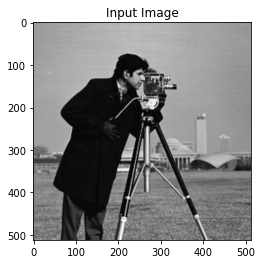

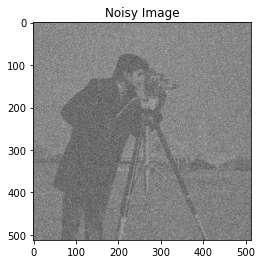

In [22]:
def add_gaussian_noise(img_gray, sigma):
    '''Return image with added gaussian noise'''
    row,col= img_gray.shape
    mean = 0
    gaussian = np.random.normal(mean, sigma, (row, col)) 
    noisy_img = img_gray + gaussian
    return noisy_img

# read in image
img = cv2.imread('cameraman.png')
img_gray = rgb2gray(img)
# plot original image
plt.title('Input Image')
plt.imshow(img, cmap='gray')

# add gaussian noise
img_gray_noise = add_gaussian_noise(img_gray, 0.5)
plt.figure()
# plot noisy image
plt.title('Noisy Image')
plt.imshow(img_gray_noise, cmap='gray')

# 2. Denoise with Fast Fourier Transform

## 2.1 Create Masks for Frequencies

In [23]:
def createMask(width, height, size):
    '''Return width by height array of 0s with square with side length size/2 of 1s in the middle'''
    mask = np.zeros((width, height))
    middle = width//2
    half = size//2
    for x in range(middle - half, middle + half):
        for y in range(middle - half, middle + half):
            mask[x][y] = 1
    return mask

## 2.2 Denoise Image Using Fast Fourier Transform

In [25]:
def denoise(img_noise, frequencies):
    '''Takes in gray image and denoises by keeping frequencies in FFT'''
    transformedImage = np.fft.fft2(img_noise)
    shiftedImage = np.fft.fftshift(transformedImage)
    maskedImage = np.multiply(shiftedImage, createMask(512, 512, frequencies))
    maskedImage[maskedImage == 0] = 1
    unshiftedMaskedImage = np.fft.ifftshift(maskedImage)
    inverseTransform = np.fft.ifft2(unshiftedMaskedImage)

    fig,(ax1,ax2) = plt.subplots(1,2)

    ax1.imshow(np.log(abs(maskedImage)), cmap='gray')
    ax2.imshow(abs(inverseTransform), cmap='gray')

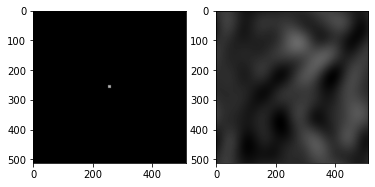

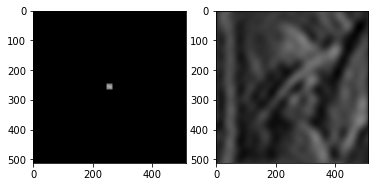

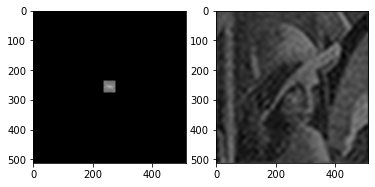

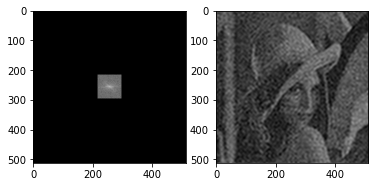

In [26]:
denoise('lenaNoise.png', 10)
denoise('lenaNoise.png', 20)
denoise('lenaNoise.png', 40)
denoise('lenaNoise.png', 80)

### Question 3

### Forward and Backward Difference

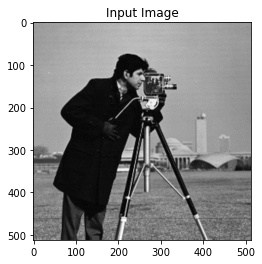

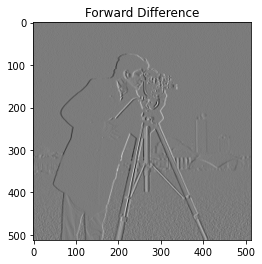

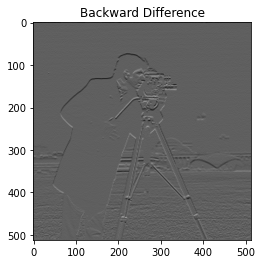

In [ ]:
def forward_difference(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,0:cols-2];
    d[:,0] = image[:,0] - image[:,cols-1];
    return d


def backward_difference(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1, :] = image[1:rows-1, :] - image[0:rows-2, :];
    d[0,:] = image[0,:] - image[rows-1,:];
    return d


# read image
img = cv2.imread('cameraman.png')
img_gray = rgb2gray(img)


# plot the image
plt.figure()
plt.title('Input Image')
plt.imshow(img_gray, cmap='gray')


# calculate forward difference and plot
forward_diff_img = forward_difference(img_gray)
plt.figure()
plt.title('Forward Difference')
plt.imshow(forward_diff_img, cmap='gray')


## calculate backward difference and plot
backward_diff_img = backward_difference(img_gray)
plt.figure()
plt.title('Backward Difference')
plt.imshow(backward_diff_img, cmap='gray')

Text(0, 0.5, 'Magnitude of Gradient of Energy')

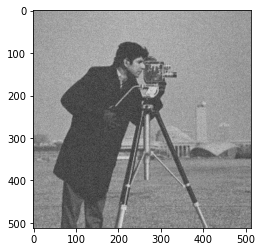

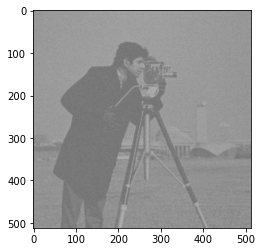

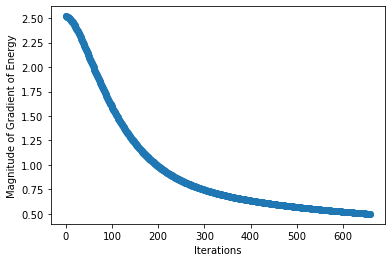

In [8]:
#gradient of datafitting is 2x the difference
#np.linalg.norm(img_gray, ord=2)
#grad df = 2(u - f)
# u starts as f
# f stays same whole time original noise image

# for(u)/mag(for(u))
# ^^ for_x + for_y
# keep going until reach a minimum change between f and u
# ||f - u||^2 l2 = (f-u)_1^2 + (f-u)_2^2... (f-u)_n^2
def get_gaussian_noise(img_gray, sigma):
    
    row,col= img_gray.shape
    mean = 0
    gaussian = np.random.normal(mean, sigma, (row, col)) 
    noisy_img = img_gray + gaussian
    return noisy_img

def forward_difference_x(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,0:cols-2];
    d[:,0] = image[:,0] - image[:,cols-1];
    return d

def forward_difference_y(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1, :] = image[1:rows-1, :] - image[0:rows-2, :];
    d[0,:] = image[0,:] - image[rows-1,:];
    return d

img = cv2.imread('cameraman.png')
img_gray = rgb2gray(img)
f = u = get_gaussian_noise(img_gray, 0.1)

def getGradient(u):
    return forward_difference_x(u) + forward_difference_y(u)

def getEnergy(f, u, l):
    return l*np.sum((np.square(f - u))) + np.sum(np.linalg.norm(getGradient(u)))

def getGrad(f, u, l):
    numerator = getGradient(u)
    denominator = np.linalg.norm(forward_difference_x(u)) + np.linalg.norm(forward_difference_y(u)) + 0.000000001
    divergence = getGradient(numerator/denominator)
    return -2*l*(f - u) - divergence
    
iters = []
energy = []
l = 0.01
i = 0
e = 1

while e > 0.5:
    grad = getGrad(f, u , l)
    u = u - 0.5 * grad
    iters.append(i)
    i += 1
    e = np.linalg.norm(getGrad(f, u , l))
    energy.append(e)

fig,ax1 = plt.subplots()
fig,ax2 = plt.subplots()
fig,ax3 = plt.subplots()

ax1.imshow(f, cmap='gray')
ax2.imshow(u, cmap='gray')
ax3.scatter(iters, energy)
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Magnitude of Gradient of Energy')

